# Introductory Section

The dataset contains information about cars from an auction website. It includes the following attributes:

- `date`: Manufactured date.
- `model`: Car’s model name.
- `company`: Company/Manufacturer name.
- `type`: Car’s type.
- `rating`: Car's rating on the auction website.
- `price`: Car’s price (in USD).
- `mileage`: Car’s mileage (in miles).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

pd.set_option('float_format', '{:f}'.format)

In [ ]:
cars_df = pd.read_csv("./Car_dataset633300104.csv")

# Changing the dtype of date to datetime
cars_df['date'] = pd.to_datetime(cars_df['date'])

In [ ]:
cars_df.dtypes

uniqueId             int64
date        datetime64[ns]
model               object
company             object
type                object
rating             float64
price              float64
mileage            float64
dtype: object

In [ ]:
cars_df

,uniqueId,date,model,company,type,rating,price,mileage
0,132932515709664,2022-09-04,X6,BMW,non-Electric,1.000000,3108.000000,90659.890000
1,132932515715520,2022-07-04,X6,BMW,non-Electric,1.000000,6204.000000,71063.180000
2,132932515716672,2022-10-06,Model Z,Tesla,Electric,2.000000,4715.000000,85703.490000
3,132932515710480,2022-07-24,Mustang,Ford,non-Electric,3.000000,3080.000000,84648.960000
4,132932515710336,2022-02-12,Mustang,Ford,non-Electric,1.000000,4567.000000,68758.860000
...,...,...,...,...,...,...,...,...
9995,132932519241584,2022-02-27,Model Z,Tesla,Electric,3.000000,3486.000000,86843.810000
9996,132932519241632,2022-03-30,X7,BMW,non-Electric,1.000000,4799.000000,98329.030000
9997,132932519241680,2022-05-10,Model Z,Tesla,Electric,3.000000,3501.000000,85036.530000
9998,132932519241728,2022-08-24,Mustang,Ford,non-Electric,3.000000,4116.000000,96058.020000


# Data Exploration

In [ ]:
cars_df.shape

(10000, 8)

In [ ]:
#Count of null values in each column
cars_df.isnull().sum()

uniqueId      0
date        394
model         0
company       0
type          0
rating      423
price       433
mileage     385
dtype: int64

In [ ]:
#Unique companies and models in the dataset
cars_df[['company', 'model', 'type']].drop_duplicates().reset_index(drop = True).sort_values(by=['company','model'])

,company,model,type
8,BMW,X5,non-Electric
0,BMW,X6,non-Electric
4,BMW,X7,non-Electric
7,Ford,F150,non-Electric
3,Ford,F210,non-Electric
2,Ford,Mustang,non-Electric
6,Tesla,Model X,Electric
5,Tesla,Model Y,Electric
1,Tesla,Model Z,Electric


In [ ]:
columns_to_check = ['date', 'rating', 'price', 'mileage']

for i in range(1, 5):
  condition = cars_df[columns_to_check].isnull().sum(axis=1) == i
  print(f"Number of Records where {i} column(s) are null: {cars_df[condition].shape[0]}")

Number of Records where 1 column(s) are null: 1426
Number of Records where 2 column(s) are null: 97
Number of Records where 3 column(s) are null: 5
Number of Records where 4 column(s) are null: 0


Observation:
- As we can see there are few null values in the dataset. So, we have to handle it.
- Reference: https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python

## Handling Missing Data

<Axes: >

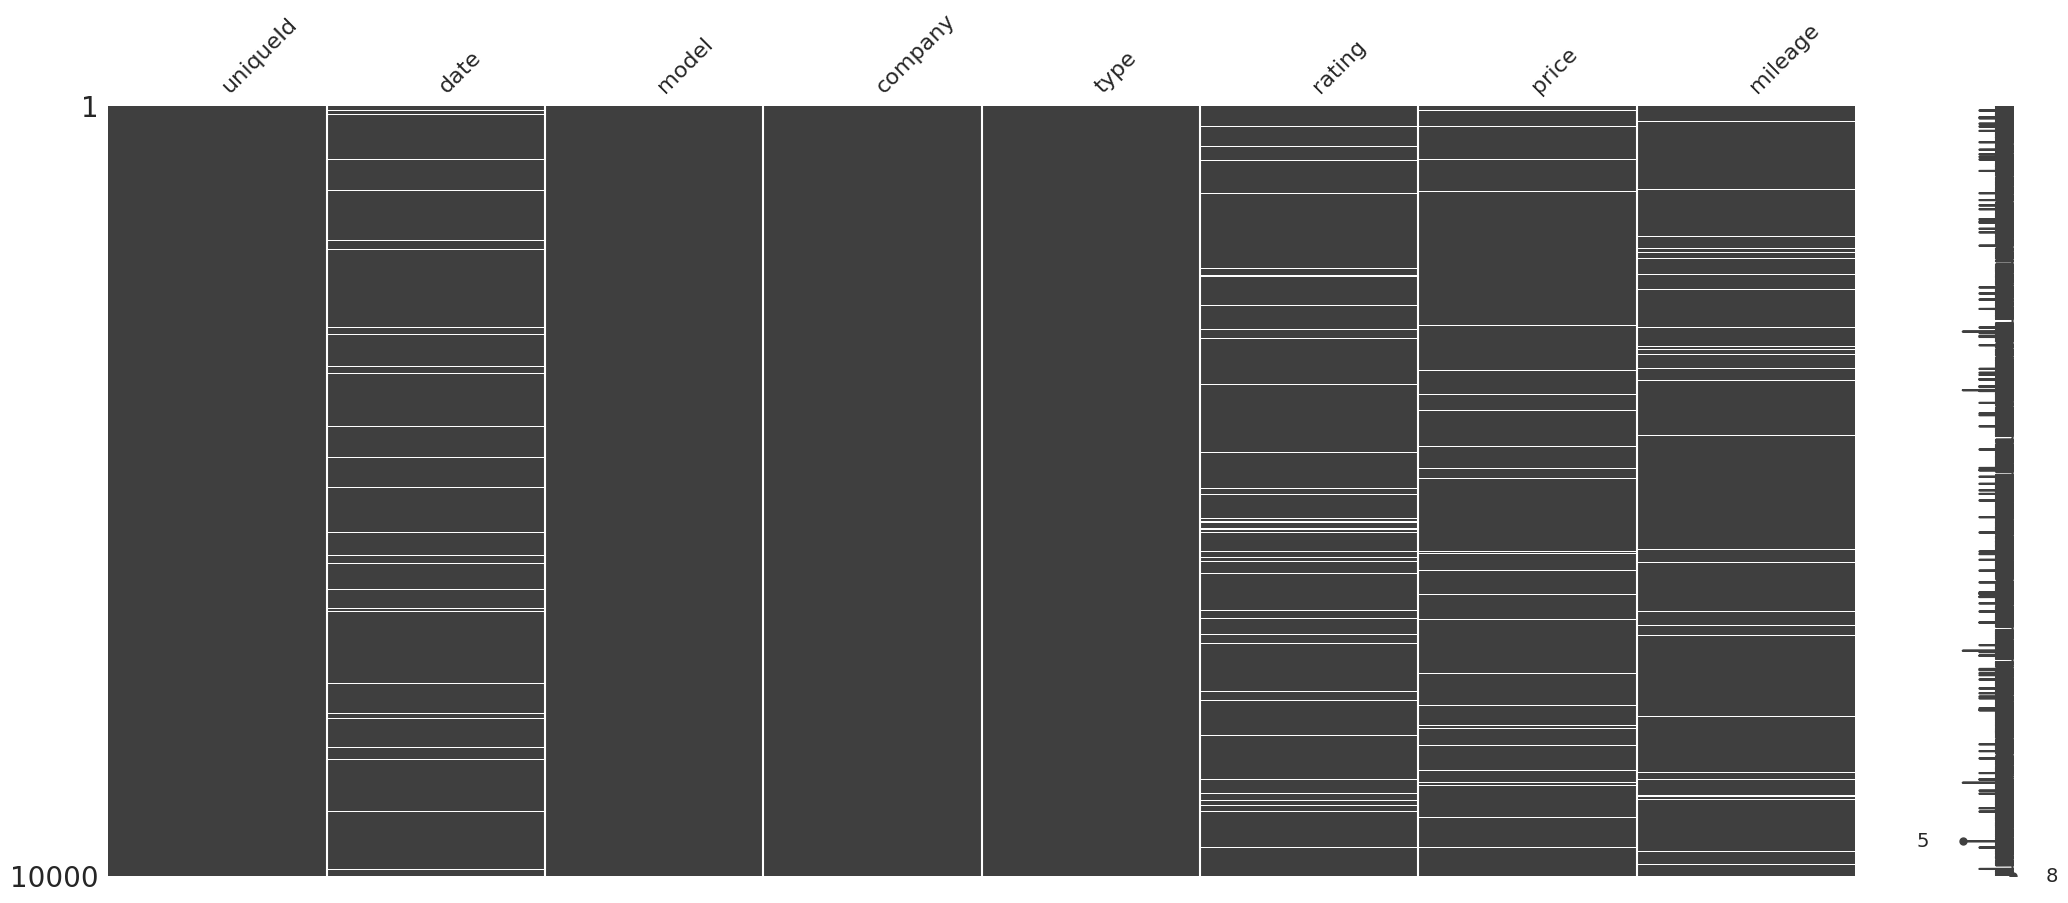

In [ ]:
# This shows in which place of the column we have null values
msno.matrix(cars_df)

In [ ]:
# We can use any of the technique mentioned in the below article. We will be using KNNImputer to impute the null values.
# Reference: https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

In [ ]:
# Encoding categorical columns as KNN Imputer can't use categorical values to find nearest neighbors
categorical_vars = cars_df[['model', 'company', 'type']]
categorical_dummies = pd.get_dummies(categorical_vars, drop_first=True)
categorical_dummies.head()

,model_F210,model_Model X,model_Model Y,model_Model Z,model_Mustang,model_X5,model_X6,model_X7,company_Ford,company_Tesla,type_non-Electric
0,False,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,True,False,False,False,True
2,False,False,False,True,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,False,True,False,True
4,False,False,False,False,True,False,False,False,True,False,True


In [ ]:
# Adding the dummy columns to our original df
cars_df_dummies = pd.concat([cars_df.drop(['uniqueId', 'date', 'model', 'company', 'type'], axis=1), categorical_dummies], axis=1)
cars_df_dummies.head()

,rating,price,mileage,model_F210,model_Model X,model_Model Y,model_Model Z,model_Mustang,model_X5,model_X6,model_X7,company_Ford,company_Tesla,type_non-Electric
0,1.000000,3108.000000,90659.890000,False,False,False,False,False,False,True,False,False,False,True
1,1.000000,6204.000000,71063.180000,False,False,False,False,False,False,True,False,False,False,True
2,2.000000,4715.000000,85703.490000,False,False,False,True,False,False,False,False,False,True,False
3,3.000000,3080.000000,84648.960000,False,False,False,False,True,False,False,False,True,False,True
4,1.000000,4567.000000,68758.860000,False,False,False,False,True,False,False,False,True,False,True


In [ ]:
# Defining the KNNImputer Object

# Reference:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
# https://stackoverflow.com/questions/61752284/understanding-sklearns-knnimputer

knn_imputer = KNNImputer(n_neighbors=3, weights="distance")

In [ ]:
# KNN Imputer will impute the null values in 'rating', 'price', 'mileage'
cars_df_withoutNull = pd.DataFrame(knn_imputer.fit_transform(cars_df_dummies), columns = cars_df_dummies.columns)

In [ ]:
# Reset index and concat both the dataframes to get all the values
cars_df_withoutNull.reset_index(drop=True, inplace=True)
cars_df.reset_index(drop=True, inplace=True)

final_df = pd.concat([cars_df[['uniqueId', 'date', 'model', 'company', 'type']], cars_df_withoutNull[['rating', 'price', 'mileage']]], axis=1)

In [ ]:
# We still have null values in 'date' column
final_df.isnull().sum()

uniqueId      0
date        394
model         0
company       0
type          0
rating        0
price         0
mileage       0
dtype: int64

In [ ]:
# Calculating the mean date for each 'company', 'model', 'type' and use the mean date to impute nulls
mean_date_df = cars_df.groupby(['company', 'model', 'type'], as_index = False).agg({'date': 'mean'}).rename(columns={'date':'mean_date'})
mean_date_df["mean_date"] = mean_date_df["mean_date"].dt.date

In [ ]:
# Code to replace null cells by 'mean_date'
final_df = pd.merge(final_df, mean_date_df, on=['company', 'model', 'type'], how='left')
final_df['date'] = final_df['date'].mask(pd.isnull, final_df['mean_date'])
final_df.drop('mean_date', axis = 1, inplace=True)

In [ ]:
# No null values now.
final_df.isnull().sum()

uniqueId    0
date        0
model       0
company     0
type        0
rating      0
price       0
mileage     0
dtype: int64

Here's how missing values were addressed in the dataset:

- `Date`: Missing values were replaced with the mean date within the specific group ('company', 'model', 'type').
- `Rating`, `Price`, `Mileage`: Missing values were imputed with KNNImputer.

# Data Trends Visualization

## Bar Charts

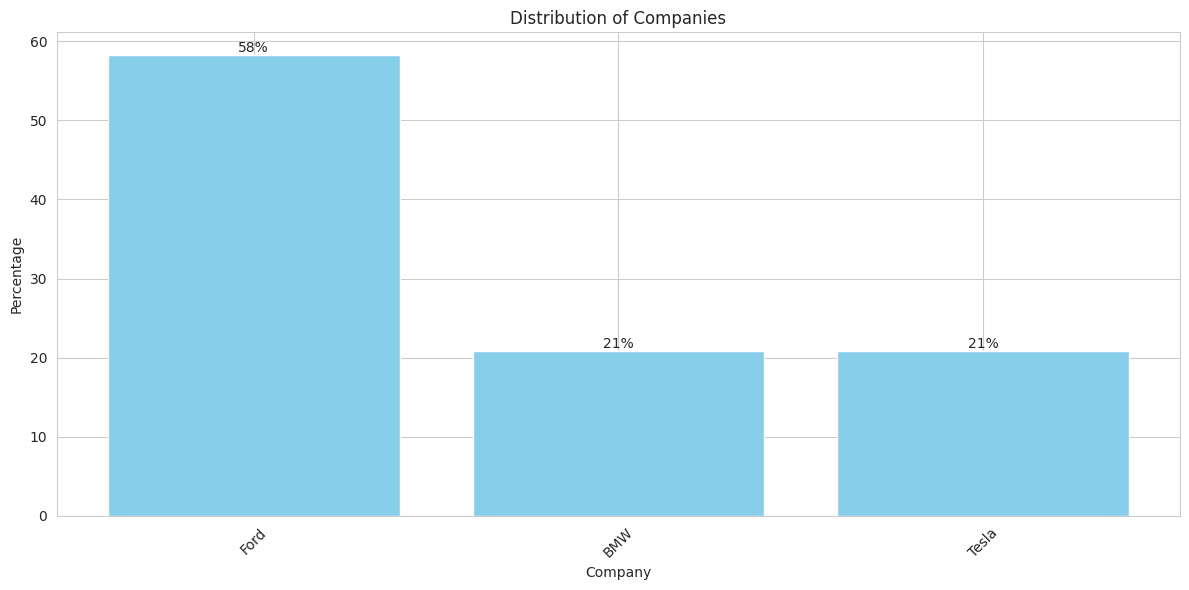

In [ ]:
#In this code block, we use Matplotlib to create a stacked bar plot showing the distribution of car models for each company.
#The x-axis represents the car companies, the y-axis represents the number of cars, and each segment of the bar represents a different car model.
# This visualization allows for easy comparison of the distribution of car models within each company, providing insights into their product offerings.


# Calculate distribution of companies
company_distribution = final_df['company'].value_counts(normalize=True) * 100


plt.figure(figsize=(12, 6))
bars = plt.bar(company_distribution.index, company_distribution.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}%',
             ha='center', va='bottom')


plt.xlabel('Company')
plt.ylabel('Percentage')
plt.title('Distribution of Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Box Plot

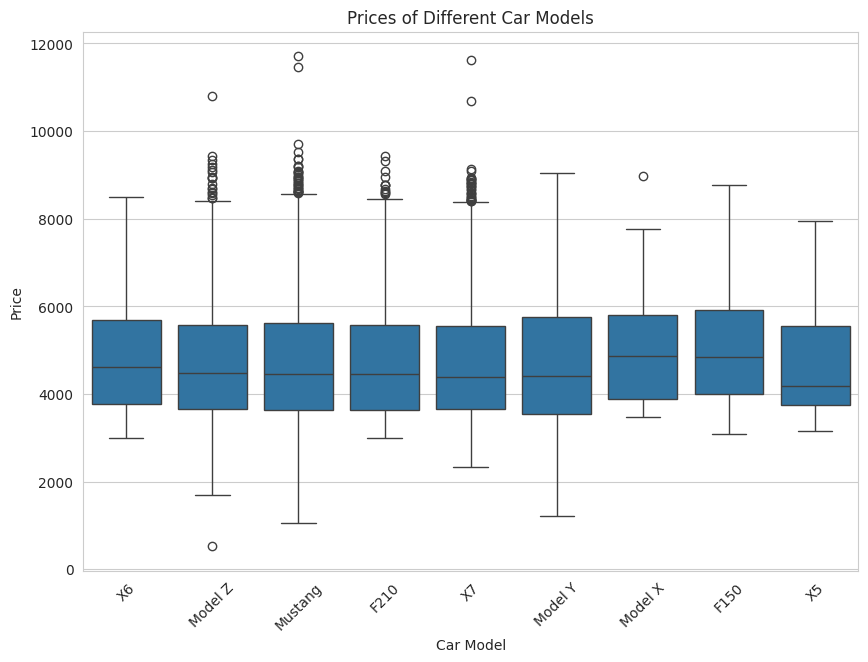

In [ ]:
#In this code block, we use a box plot to visualize the distribution of car prices across different models.
#A box plot is particularly useful for comparing the spread and central tendency of price data among multiple categories (car models, in this case).
# The box represents the interquartile range (IQR) of the data, with the line inside the box indicating the median price.
#The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles, respectively.
#Any points beyond the whiskers are considered outliers and are represented individually.
#This visualization allows for easy comparison of price distributions across different car models, helping to identify variations and outliers in the data.


# Prices of different car models
sns.set_style("whitegrid")
plt.figure(figsize=(10, 7))
sns.boxplot(x='model', y='price', data=final_df)
plt.title('Prices of Different Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

## Line Plot

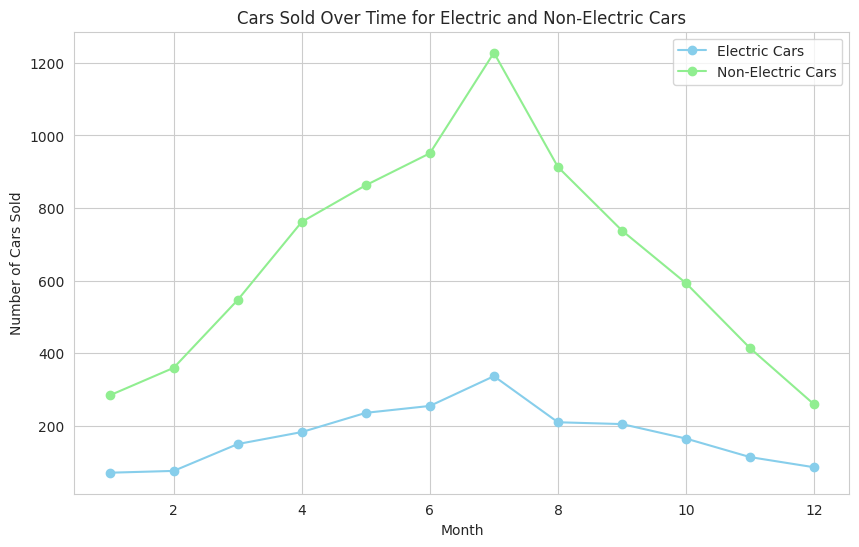

In [ ]:
#In this code block, we filter the dataset to separate electric and non-electric cars and then group the data by month to count the number of cars sold each month for both types.
#Finally, we create a line plot to visualize the trend of cars sold over time, with one line representing electric cars and the other representing non-electric cars.
#The plot allows for comparison of sales trends between electric and non-electric cars over the months.


# Filter the dataset for electric and non-electric cars
electric_cars = final_df[final_df['type'] == 'Electric']
non_electric_cars = final_df[final_df['type'] != 'Electric']

# Group the data by year and count the number of cars sold each year for electric and non-electric cars
electric_cars_sold_over_time = electric_cars.groupby(electric_cars['date'].dt.month).size()
non_electric_cars_sold_over_time = non_electric_cars.groupby(non_electric_cars['date'].dt.month).size()

plt.figure(figsize=(10, 6))
plt.plot(electric_cars_sold_over_time.index, electric_cars_sold_over_time.values, marker='o', color='skyblue', label='Electric Cars')
plt.plot(non_electric_cars_sold_over_time.index, non_electric_cars_sold_over_time.values, marker='o', color='lightgreen', label='Non-Electric Cars')
plt.title('Cars Sold Over Time for Electric and Non-Electric Cars')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.legend()
plt.grid(True)
plt.show()


## Scatter Plot

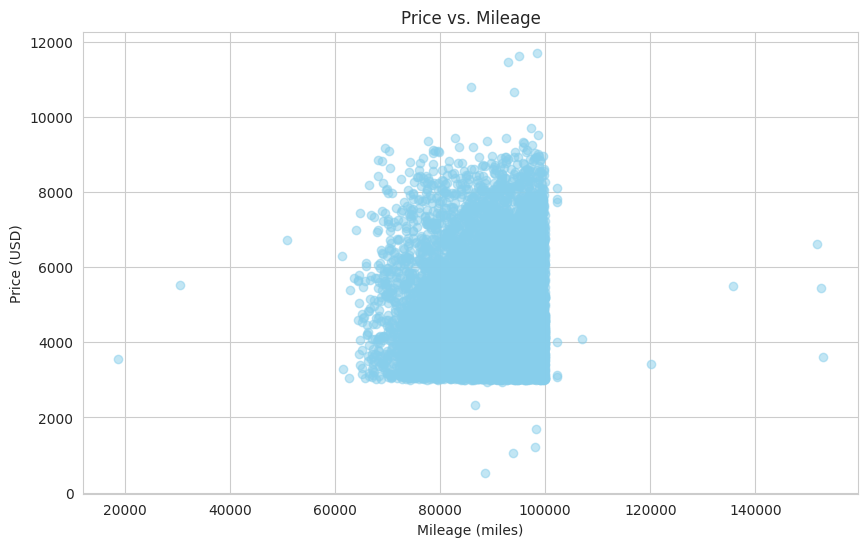

In [ ]:
#In this code block, we create a scatter plot to visualize the relationship between the price and mileage of cars.
#Each point on the plot represents a car, with its position determined by its mileage (x-coordinate) and price (y-coordinate).
#The plot allows us to observe any potential patterns or trends between car prices and mileage, such as whether higher mileage tends to correlate with lower prices.
#The transparency of the points is adjusted to ensure that overlapping points are distinguishable, and grid lines are added to aid in reading values from the plot.


plt.figure(figsize=(10, 6))
plt.scatter(final_df['mileage'], final_df['price'], color='skyblue', alpha=0.5)

plt.title('Price vs. Mileage')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


## Histograms

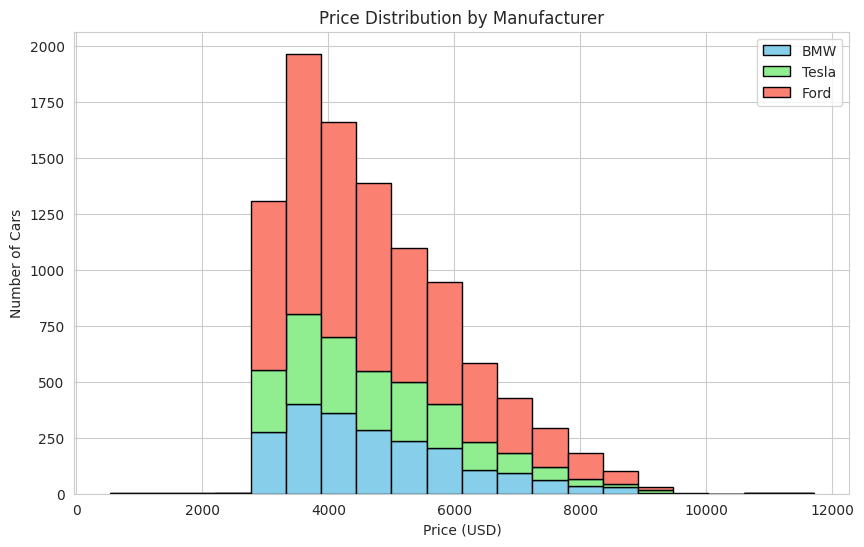

In [ ]:
#In this code block, we aim to visualize the distribution of car prices for each manufacturer.
#We use a histogram to achieve this, where each manufacturer's prices are represented by a separate histogram.
#The x-axis represents the price of cars in USD, while the y-axis represents the number of cars falling into each price range.
#By stacking the histograms, we can compare the price distributions among different manufacturers.
# The legend helps identify each manufacturer's histogram, and grid lines are added to improve readability.


# Price Distribution by Manufacturer
manufacturers = final_df['company'].unique()

plt.figure(figsize=(10, 6))
plt.hist([final_df[final_df['company'] == manufacturer]['price'] for manufacturer in manufacturers],
         bins=20, color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black', stacked=True)

plt.title('Price Distribution by Manufacturer')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Cars')
plt.legend(manufacturers)
plt.grid(True)
plt.show()


## Pie Chart

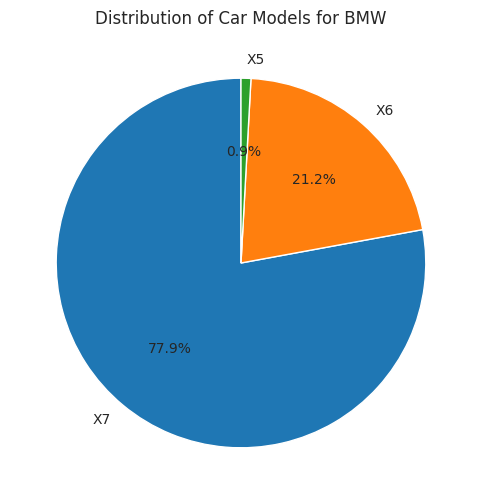

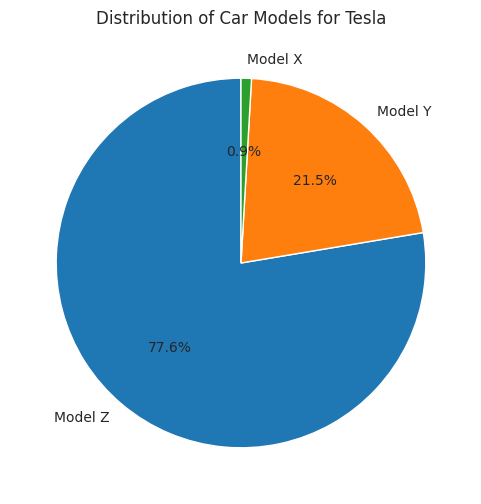

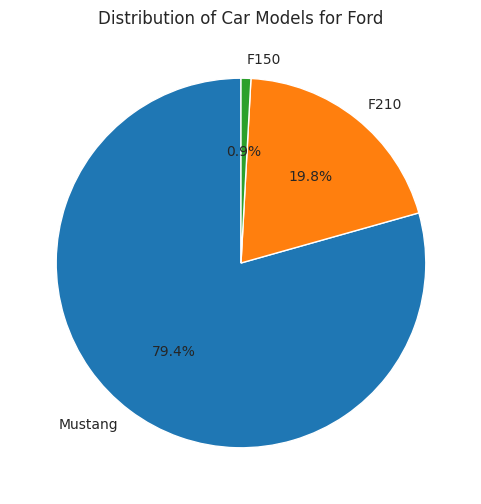

In [ ]:
#In this code block, we iterate through each unique car company in the dataset.
#For each company, we filter the data to include only the cars manufactured by that company.
#Then, we calculate the distribution of car models within that company and create a pie chart to visualize this distribution.
#Each pie chart represents the percentage distribution of car models for a specific company, providing insights into the variety of models offered by each manufacturer.


# Get unique companies
unique_companies = final_df['company'].unique()

# Plotting individual pie charts for each company
# Group the filtered data by 'model' and count the occurrences
for company in unique_companies:
    company_data = final_df[final_df['company'] == company]
    model_distribution = company_data['model'].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(model_distribution, labels=model_distribution.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of Car Models for {company}')
    plt.show()


## Heatmap

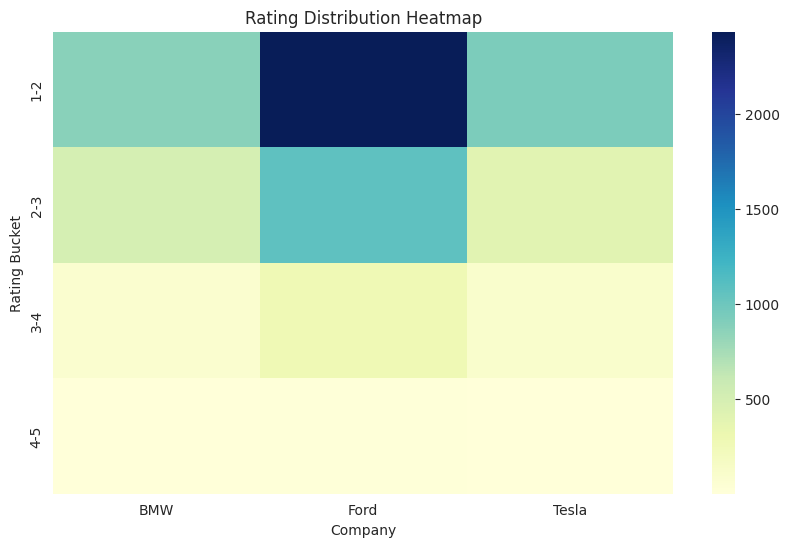

In [ ]:
#In this code block, we group ratings into bins of ratings-range and create a heatmap to visualize the distribution of ratings across different companies.
#Each cell in the heatmap represents the frequency of ratings falling into each rating bucket (e.g., '1-2', '2-3', etc.) for each company.
#The color intensity indicates the relative frequency, with darker shades indicating higher frequencies.
#This visualization helps to identify any patterns or trends in the distribution of ratings among different companies.


# Group ratings into bins of ratings-range
final_df['rating_bucket'] = pd.cut(final_df['rating'], bins=[1, 2, 3, 4, 5], labels=['1-2', '2-3', '3-4', '4-5'])

# Pivot the table to get rating distribution by company and rating bucket
rating_distribution_heatmap = final_df.pivot_table(index='rating_bucket', columns='company', aggfunc='size')

plt.figure(figsize=(10, 6))
sns.heatmap(rating_distribution_heatmap, cmap='YlGnBu')

plt.title('Rating Distribution Heatmap')
plt.xlabel('Company')
plt.ylabel('Rating Bucket')
plt.show()


# Conclusion

- The dataset highlights a predominant presence of non-electric vehicles.
- Among the three prominent brands analyzed, Ford emerges as the leader in market share.
- Despite the diversity in brands, our analysis reveals consistent trends in average car prices and the relationship between price and mileage.
- Intriguingly, the ratings across different brands exhibit surprising uniformity.
